# Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# EDA

In [55]:
dfhappy = pd.read_csv('/Users/alexweirth/Documents/cs_370_final_project-main/happiness_data_cleaned.csv')

### Correlation between Happiness Score and Variables

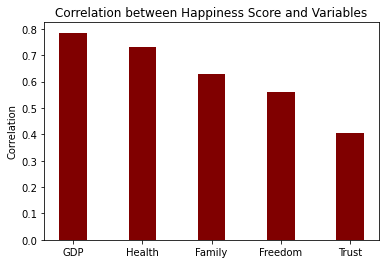

In [56]:
freedom = dfhappy["Happiness Score"].corr(dfhappy["Freedom"])
gdp     = dfhappy['Happiness Score'].corr(dfhappy["Economy (GDP per Capita)"])
family  = dfhappy['Happiness Score'].corr(dfhappy["Family (Social Support)"])
health  = dfhappy['Happiness Score'].corr(dfhappy["Health (Life Expectancy)"])
trust   = dfhappy['Happiness Score'].corr(dfhappy["Trust (Government Corruption)"])

corr_columns = ["GDP", "Health", "Family", "Freedom", "Trust"]
corr_numbers = [gdp, health, family, freedom, trust]

plt.bar(corr_columns, corr_numbers, color ='maroon', width = 0.4)
plt.ylabel("Correlation")
plt.title("Correlation between Happiness Score and Variables")
plt.show()

Here we can see that Hapiness Score is most correlated with GDP, and then health metrics, family metrics, freedom, and government trust in descending order.

There is visual overlap here of the y axis labels, however we can see that on the right the average health rating plummeted in 2020 due to the covid-19 pandemic however in that same time period the average happiness score skyrockets which is an interesting trend.

### Making a correlation plot between all variables

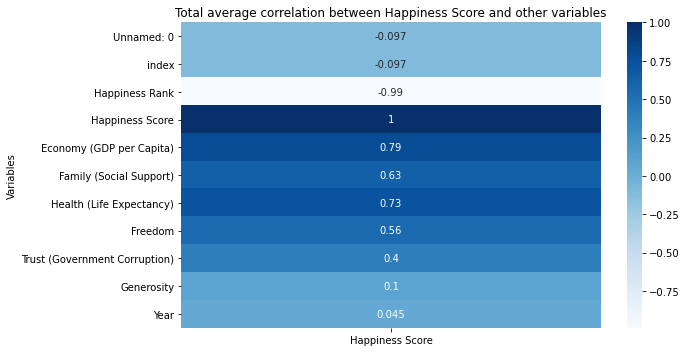

In [58]:
plt.figure(figsize=(10, 5))
correlation = dfhappy.corr()
response = pd.DataFrame(correlation["Happiness Score"])
sns.heatmap(response, annot=True, cmap=plt.cm.Blues)
plt.title("Total average correlation between Happiness Score and other variables")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# How did correlation between happiness score and features change from 2015-2020?

### 2015 Correlation between Happiness Score and other variables

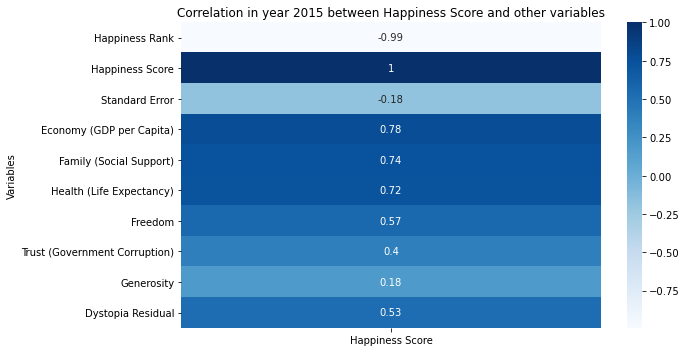

In [59]:
plt.figure(figsize=(10, 5))
correlation = df2015.corr()
response = pd.DataFrame(correlation["Happiness Score"])
sns.heatmap(response, annot=True, cmap=plt.cm.Blues)
plt.title("Correlation in year 2015 between Happiness Score and other variables")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

### 2020 Correlation between Happiness Score and other variables

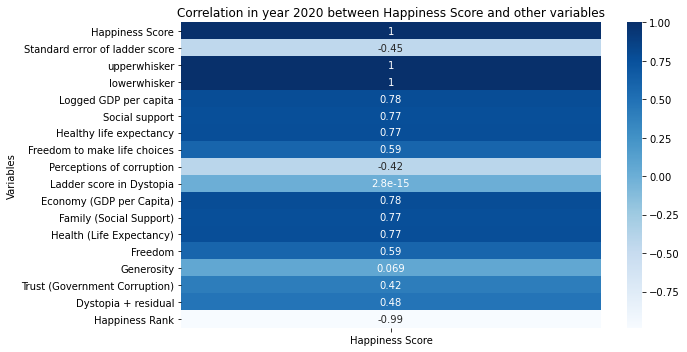

In [60]:
plt.figure(figsize=(10, 5))
correlation = df2020.corr()
response = pd.DataFrame(correlation["Happiness Score"])
sns.heatmap(response, annot=True, cmap=plt.cm.Blues)
plt.title("Correlation in year 2020 between Happiness Score and other variables")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

### How did happiness scores change during the Covid-19 pandemic?

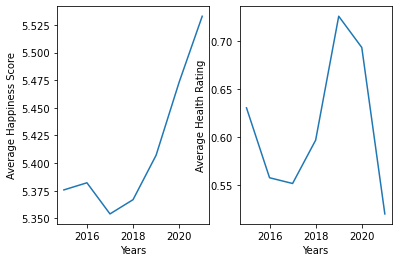

In [57]:
avg_happiness_per_year = dfhappy.groupby("Year").agg({'Happiness Score' : 'mean'})
avg_health_by_year = dfhappy.groupby("Year").agg({"Health (Life Expectancy)" : 'mean'})
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
health_vs_happiness_per_year = avg_happiness_per_year.merge(avg_health_by_year, on="Year")

plt.subplot(1, 2, 1) 
plt.ylabel("Average Happiness Score")
plt.xlabel("Years")
plt.plot(years, avg_happiness_per_year["Happiness Score"])
plt.subplot(1, 2, 2) 
plt.ylabel("Average Health Rating")
plt.xlabel("Years")
plt.plot(years, avg_health_by_year["Health (Life Expectancy)"])
plt.show()

### Pairplot

In [61]:
dfhappy.columns.to_list()

['Unnamed: 0',
 'index',
 'Happiness Rank',
 'Country',
 'Region',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family (Social Support)',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Year']

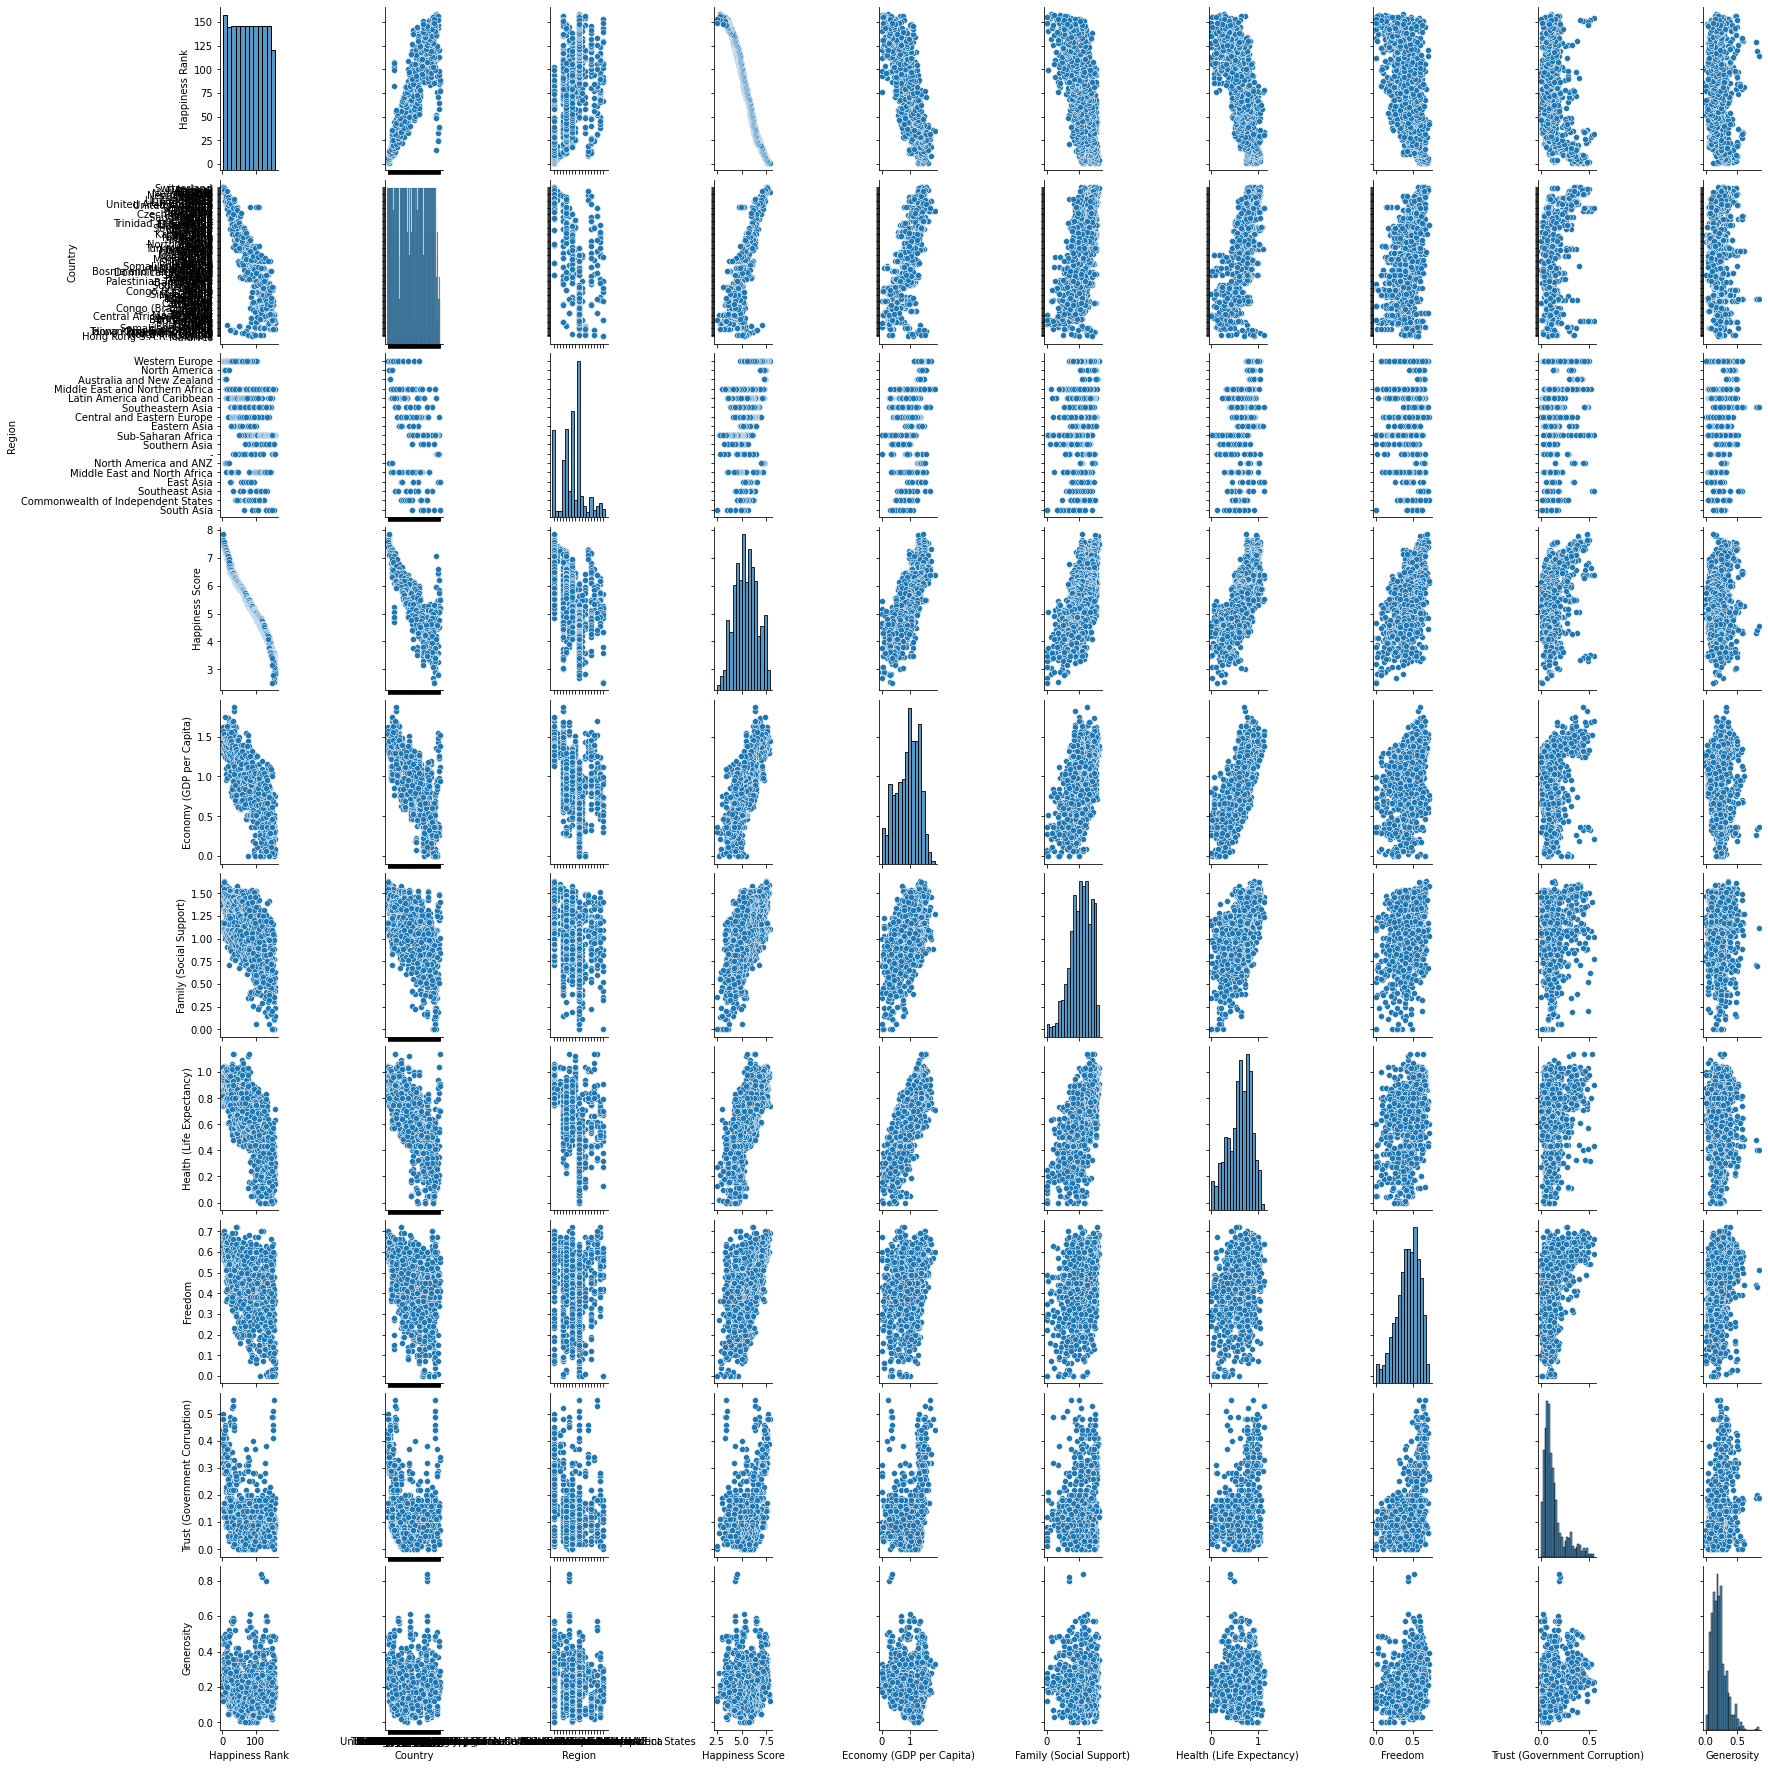

In [62]:
sns.pairplot(dfhappy, vars = ['Happiness Rank',
 'Country',
 'Region',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family (Social Support)',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity'])

### Rankings of Countries Happiness

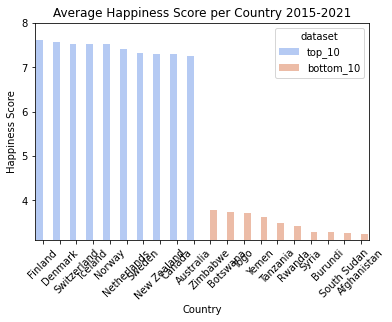

In [63]:
countries = dfhappy.groupby("Country", as_index = False).agg({"Happiness Score":"mean"})
top_10 = countries.sort_values("Happiness Score", ascending = False).iloc[0:10]
bottom_10 = countries.sort_values("Happiness Score").iloc[10:0:-1]

concat = pd.concat([top_10.assign(dataset="top_10"), bottom_10.assign(dataset = "bottom_10")])
sns.barplot(x = 'Country', y = 'Happiness Score', data = concat, hue = "dataset", palette = "coolwarm")

plt.title("Average Happiness Score per Country 2015-2021")
plt.xticks(rotation = 45, fontsize = 10)

ax = plt.gca()
ax.set_ylim([3.1, 8])

plt.show()


Here we can see scandnavian countries all of which have very high GDP scores have the highest happiness scores while the inverse relationship is also true for the developing countries in the dataset. For this data, it does in fact seem like money = happiness.